# 12 Model \#2: Logistic Regression
__Math 3080: Fundamentals of Data Science__

Reading:
* [Nield, Thomas, *Essential Math for Data Science*, 2022](https://learning.oreilly.com/library/view/essential-math-for/9781098102920/), Chapter 6
* [Bruce, Peter, et. al., *Practical Statistics for Data Science*, 2020](https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/), Chapter 5

Other helps:
* [AssemblyAI YouTube video: How to implement Logistic Regression from scratch with Python](https://www.youtube.com/watch?v=YYEJ_GUguHw&t=67s)

Outline:
* Recap of Linear and Multiple Linear Regression
* Linear regression works when the y-variable had a distribution (variance). That is, when the y-variable is continuous, it at least discrete but unbounded
* But what if you're y-variable is binary: yes it no, true or false, group A or group B?
* e^x,  e^-x,  1+e^-x,  1/(1+e^-x)
* Iris dataset
  * Petal length indicates Virginia type
* Multi-variable

-----

In [128]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

To cover at the beginning:
* Linear regression is used to compare one variable with another variable
  * Can see trends in a scatterplot
* But if the y-variable is binary (one of two options, we generally say 0 or 1 for simplicity), we can use the logistic regression model
* The logistic regression deals with probability

The __odds__ probability is the ratio of the probability of a success over the probability of a failure.
$$odds = \frac{p}{1-p}$$

When we apply a natural logarithm to the odds, we get a __logit__ function (also known as the log-odds function).
$$logit=\ln\left(\frac{p}{1-p}\right)$$

This is a nice function because it deals with values between 0 and 1, which means we can look at the probability of a number being one value or another.

What we want to do is relate this logit function to the linear regression we have already done. Then if we solve for the probability, we get a method to calculate the probability that a particular value is in one category or the other.
$$\ln\left(\frac{p}{1-p}\right) = f(x)$$
$$\frac{p}{1-p} = e^{f(x)}$$
$$p = e^{f(x)} - p e^{f(x)}$$
$$p + e^{f(x)} = e^{f(x)}$$
$$p(1+e^{f(x)}) = e^{f(x)}$$
$$p = \sigma(x) = \frac{e^{f(x)}}{1+e^{f(x)}} = \frac{1}{1+e^{-f(x)}}$$

This function is known as the __sigmoid curve__, or simply the __S-curve__. Here is what the curve would look like:

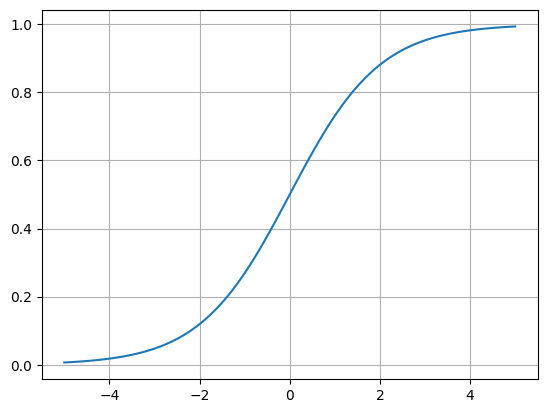

In [129]:
x = np.linspace(-5,5,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.grid(True)
plt.show()

Now, we apply this to our Linear Regression line, where $f(x) = \theta_0 + \theta_1 x$,
$$p = \sigma_\theta(x) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x)}}$$

This equation is the basis for our Logistic Regression. Unfortunately, it's not perfect. We'll fix it up in a minute, but first, let's look at the iris dataset.

In [130]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

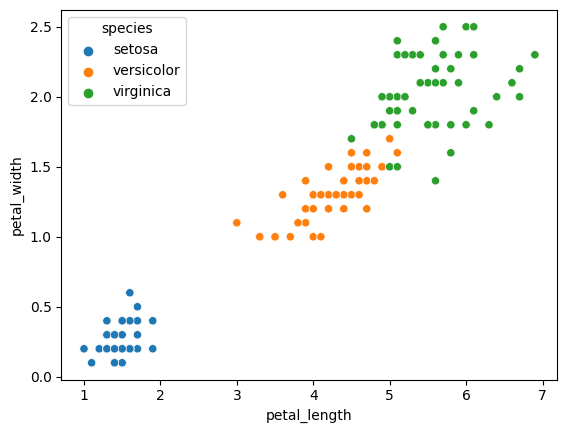

In [131]:
sns.scatterplot(data=iris, x='petal_length',y='petal_width', hue='species')

There is definitely a linear relationship here. Let's create our linear regression line:

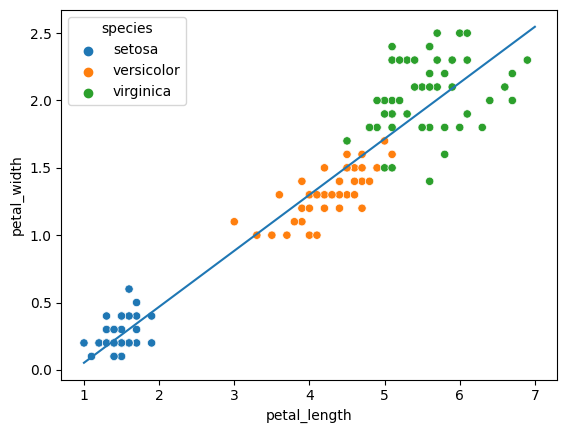

In [132]:
X = iris['petal_length']
X_bar = X - np.mean(X)

y = iris['petal_width']
Y_bar = y - np.mean(y)

# Slope of linear regression line
a = X_bar.dot(Y_bar) / X_bar.dot(X_bar)

# y-intercept of linear regression line
b = np.mean(y) - a*np.mean(X)

# Plot
sns.scatterplot(data=iris, x='petal_length',y='petal_width', hue='species')
x = np.linspace(1,7,100)
plt.plot(x, a*x + b)
plt.show()

But we also see that the species are grouped (clustered). Let's create another variable indicating whether it is a particular species of iris or not.

In [133]:
iris = iris.join(pd.get_dummies(iris['species']))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


<AxesSubplot: xlabel='petal_length', ylabel='setosa'>

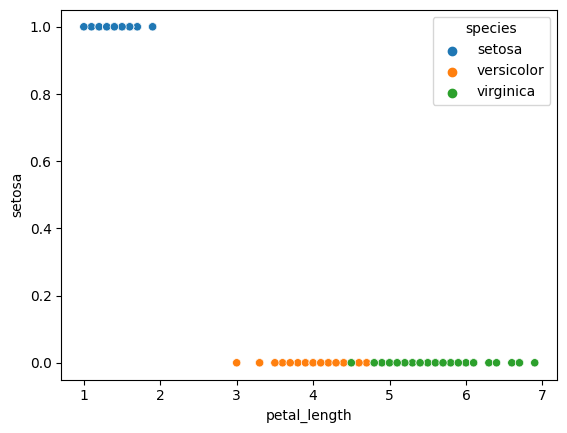

In [134]:
sns.scatterplot(data=iris, x='petal_length', y='setosa', hue='species')

If we create a linear regression, it won't do very well, as our line can only pass through one point in each group. So, let's do the linear regression and apply it to a logistic regression. Let's look at what this will be in the end, then we'll do the calculations ourselves. First, here is the application of a pre-made model from sklearn:

In [135]:
def logistic_reg(x, b, w):
    return 1/(1 + np.exp(-(b + w*x)))

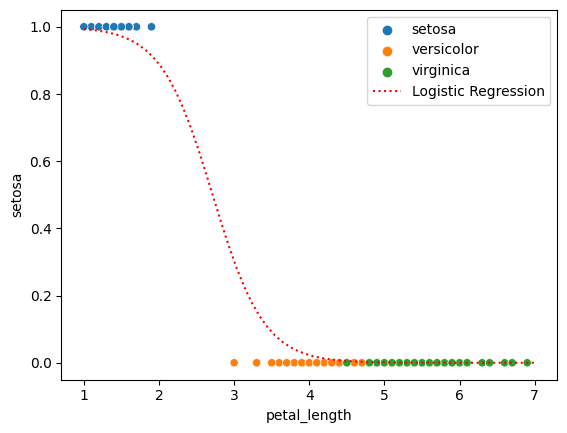

Weight (Slope) = [-2.9192494] ... Bias (y-intercept) = [7.92206883]


In [136]:
X = iris['petal_length']
y = iris['setosa']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(np.array(X).reshape(-1,1), np.array(y))
b1 = model.coef_.flatten()
b0 = model.intercept_

x = np.linspace(1,7,60)
log_reg = logistic_reg(x,b0,b1)  #  1/(1+np.exp(-(b0 + b1*x)))

fig, ax = plt.subplots()

sns.scatterplot(data=iris, x='petal_length', y='setosa', hue='species')
ax.plot(x, log_reg, label="Logistic Regression", color='red', linestyle=':')
plt.legend()

plt.show()
print(f'Weight (Slope) = {b1} ... Bias (y-intercept) = {b0}')

When the petal length is less than 2, then petal length has a very high probability of being a Setosa variety of iris. Around a petal length of 2.75, that probability drops to 0.50. Lengths larger than 3 have a low probability of being a Setosa, so they would be categorized as "Not Setosa".

Now, let's apply this ourselves.

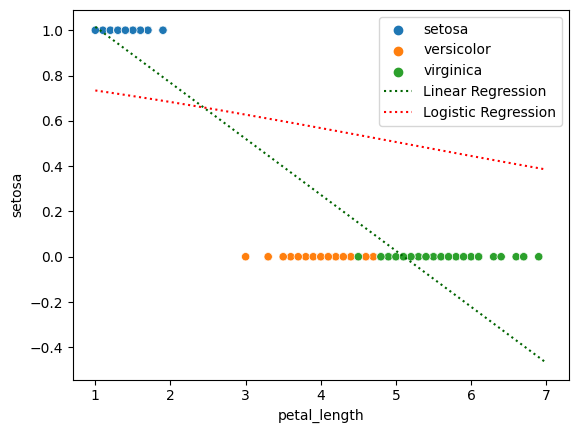

In [137]:
X = iris['petal_length']
y = iris['setosa']

X_bar = X - np.mean(X)
Y_bar = y - np.mean(y)

# Slope (or weight) of linear regression line
b1 = X_bar.dot(Y_bar) / X_bar.dot(X_bar)

# y-intercept (or bias) of linear regression line
b0 = np.mean(y) - b1*np.mean(X)

# Linear Regression Line
x = np.linspace(1,7,60)
y_linear = b0 + b1*x

# Logistic Regression Curve
log_reg = logistic_reg(x,b0,b1)  # 1/(1 + np.exp(-(b0 + b1*x_new)))

fig, ax = plt.subplots()

sns.scatterplot(data=iris, x='petal_length', y='setosa', hue='species')
ax.plot(x, y_linear, label="Linear Regression", color='darkgreen', linestyle=':')
ax.plot(x, log_reg, label="Logistic Regression", color='red', linestyle=':')
plt.legend()

plt.show()

Ok. So, we've seen the process. However, we also see that it is not very good. How could our model be so bad? Because we have only taken the linear regression and added that directly to the sigmoid function. Now, we have to look at the errors and minimize those errors. 

We will be discussing this in more detail over the next couple of semesters. The process we are going to discuss is described well here:
* Andrew Ng
  * [YouTube: Lecture 6.4 - Logistic Regression - Cost Function](https://www.youtube.com/watch?v=HIQlmHxI6-0)
  * [YouTube: Lecture 6.5 - Logistic Regression - Simplified Cost Function and Gradient Descent](https://www.youtube.com/watch?v=TTdcc21Ko9A)

To measure the error of a logistic function, we use what is called the __Cross entropy cost function__.
$$J(\theta) = \frac{1}{N}\sum_{i=1}^n \left[y_i \ln(\sigma_\theta(x_i)) + (1-y_i)\ln (1-\sigma_\theta(x_i)) \right]$$

But to find how to fix the error, let's look at how the cross entropy changes if we change the weights and biases. Remember that $\theta$ are the weights and biases, so let's rename them just for now to make more sense of this process:
$$\hat{y} = \theta_0 + \theta_1 x \qquad\to\qquad \hat{y} = b + wx$$

Now, take the derivative of our cross entropy:
$$J'(\theta) = \begin{bmatrix} \frac{dJ}{dw} \\ \frac{dJ}{db}\end{bmatrix} = \begin{bmatrix}
\frac{1}{N}\sum 2x_i(\hat{y}-y_i) \\
\frac{1}{N}\sum 2(\hat{y}-y_i) \end{bmatrix}$$

If we treat each of these as differentials, then we find out how much $J$ should change ($dJ$) as $w$ changes ($dw$) or as $b$ changes ($db$):
$$dJ = \frac{1}{N}\sum 2x_i(\hat{y}-y_i) dw \qquad\qquad dJ = \frac{1}{N}\sum 2(\hat{y}-y_i) db$$

### Gradient Descent
The next question is how big $dw$ and $db$ should be. It is tempting to cut right to the end and get to the answer as soon as possible. However, it is possible that too large of a differential will cause us to jump right over the solution. But if we make it too small, then our computer will need to make a large number of calculations and will take forever to reach a solution.

The rate at which we move toward the answer is known as the __learning rate__ ($\alpha$). We then update our weights and biases:
$$w = w - \alpha\cdot dw \qquad\qquad b = b - \alpha\cdot db$$

Going through this process, we can update the weights and biases step by step to minimize the errors. Eventually, we will get the same results as the model:

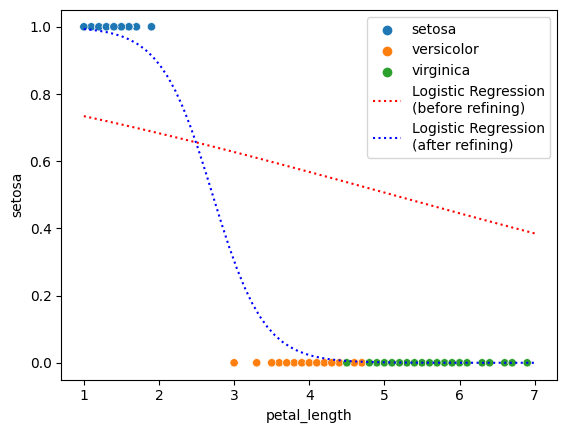

In [138]:
fig, ax = plt.subplots()

sns.scatterplot(data=iris, x='petal_length', y='setosa', hue='species')

# Logistic Regression Curve (before refining)
ax.plot(x, log_reg, label="Logistic Regression\n(before refining)", color='red', linestyle=':')

# Logistic Regression Curve (after refining) - Values from the model
b0 = 7.922
b1 = -2.919
log_reg2 = logistic_reg(x_new,b0,b1)  # 1/(1 + np.exp(-(b0 + b1*x_new)))

ax.plot(x, log_reg2, label="Logistic Regression\n(after refining)", color='blue', linestyle=':')
plt.legend()

plt.show()

In [140]:
# Loop through 1.0, 1.5, 2.0, 2.5, ... , 4.5, 5.0
# Take L as 2, 3, 4, ..., 10, then divide L by 2
for L in range(2,11):
    print("Probability of a length of {0} = {1:0.2f}%".format(L/2, 100*logistic_reg(L/2, 7.922, -2.9193)))

Probability of a length of 1.0 = 99.33%
Probability of a length of 1.5 = 97.19%
Probability of a length of 2.0 = 88.93%
Probability of a length of 2.5 = 65.11%
Probability of a length of 3.0 = 30.24%
Probability of a length of 3.5 = 9.15%
Probability of a length of 4.0 = 2.29%
Probability of a length of 4.5 = 0.54%
Probability of a length of 5.0 = 0.13%


In [152]:
def accuracy(y_pred, y_actual):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_pred)):
        if (y_pred[i] == 0) & (y_actual[i] == 0):
            TN += 1
        elif (y_pred[i] == 0) & (y_actual[i] == 1):
            FN += 1
        elif (y_pred[i] == 1) & (y_actual[i] == 0):
            FP += 1
        elif (y_pred[i] == 1) & (y_actual[i] == 1):
            TP += 1
            
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    print("Accuracy  = {0}".format(accuracy))
    print("Precision = {0}".format(precision))
    print("Recall    = {0}".format(recall))
    print("F1 Score  = {0}".format( 2*precision*recall / (precision + recall) ))
    

y_pred = iris['petal_length'].apply(lambda x: 1 if logistic_reg(x, 7.922, -2.9193) > 0.50 else 0)
accuracy(y_pred, iris['setosa'])

Accuracy  = 1.0
Precision = 1.0
Recall    = 1.0
F1 Score  = 1.0


In this example, the groups have been pretty clearly separated. But if we look at the Virginica species, they are not clearly separated:

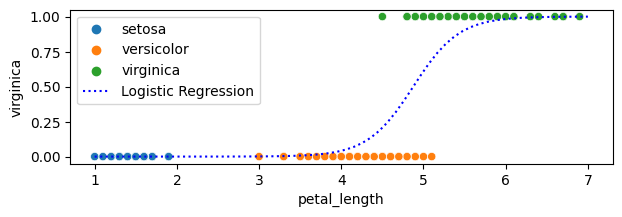

Weight (Slope) = [3.59114121] ... Bias (y-intercept) = [-17.51059761]

Probability of a length of 2.0 = 0.00%
Probability of a length of 2.5 = 0.02%
Probability of a length of 3.0 = 0.12%
Probability of a length of 3.5 = 0.71%
Probability of a length of 4.0 = 4.12%
Probability of a length of 4.5 = 20.56%
Probability of a length of 5.0 = 60.92%
Probability of a length of 5.5 = 90.37%
Probability of a length of 6.0 = 98.26%

Accuracy  = 0.9533333333333334
Precision = 0.9215686274509803
Recall    = 0.94
F1 Score  = 0.9306930693069307


In [155]:
X = iris['petal_length']
y = iris['virginica']


# Create Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(np.array(X).reshape(-1,1), np.array(y))
b1 = model.coef_.flatten()
b0 = model.intercept_

x = np.linspace(1,7,60)
log_reg = logistic_reg(x,b0,b1)

# Plot the model with the points
fig, ax = plt.subplots(figsize=(7,2))

sns.scatterplot(data=iris, x='petal_length', y='virginica', hue='species')
ax.plot(x, log_reg, label="Logistic Regression", color='blue', linestyle=':')
plt.legend()

plt.show()
print(f'Weight (Slope) = {b1} ... Bias (y-intercept) = {b0}\n')

# Loop through 2.0, 2.5, 3.0, 3.5, ... , 5.5, 6.0
# Take L as 4, 5, 6, ..., 12, then divide L by 2
for L in range(4,13):
    print("Probability of a length of {0} = {1:0.2f}%".format(L/2, 100*logistic_reg(L/2, -17.511, 3.591)))

print("")
y_pred = iris['petal_length'].apply(lambda x: 1 if logistic_reg(x, -17.511, 3.591) > 0.50 else 0)
accuracy(y_pred, iris['virginica'])

The model shows that if the petal length is 4.5, there is only a 20% chance that the flower is a Virginica. However, if the petal length is 5.5, then there is a 90% chance that it is a Virginica.

## Logistic Regression with multiple variables
We have done a logistic regression based on one variable. However, the results can become more accurate if we can use a logistic regression with more than one variable. For example, there are 4 variables that can be used in the iris dataset:

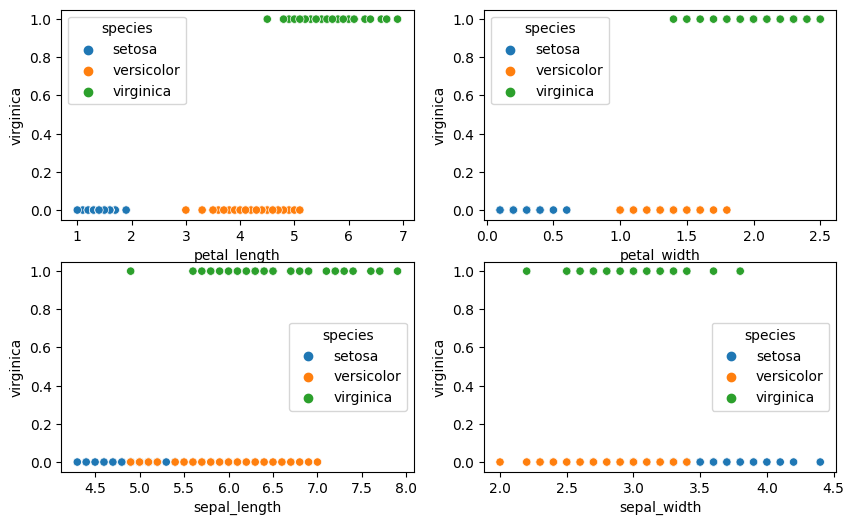

In [142]:
fig, ax = plt.subplots(2,2, figsize=(10,6))

sns.scatterplot(data = iris, x = 'petal_length', y = 'virginica', hue='species', ax=ax[0,0])
sns.scatterplot(data = iris, x = 'petal_width', y = 'virginica', hue='species', ax=ax[0,1])
sns.scatterplot(data = iris, x = 'sepal_length', y = 'virginica', hue='species', ax=ax[1,0])
sns.scatterplot(data = iris, x = 'sepal_width', y = 'virginica', hue='species', ax=ax[1,1])

plt.show()

How do we handle a logistic regression with multiple variables? When we did Linear Regression, we found our line of best fit as,
$$f(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \dots$$

We can use this same equation as a start for our logistic regression:
$$\sigma(x) = \frac{1}{1+e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \dots)}}$$

At this point, we will leave logistic regression. We will revisit this in MATH 3480 Machine Learning.

Questions about Logistic Regression:
* Supervised or Unsupervised Learning?
* Batch or Online Learning?
* Instance- or Model-based?